### Supermart Grocery Sales - Retail Analytics

- This project focuses on using a dataset of grocery sales at a supermarket. 
- The dataset includes columns such as Order ID, Customer Name,
Category, Sub Category, City, Order Date, Region, Sales, Discount,
Profit, State, month_no, Month, and year. 

#### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Step 2: Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  2017-11-08  North   1254      0.12  401.28  Tamil Nadu  
1  2017-11-08  South    749      0.18  149.80  Tamil Nadu  
2  2017-06-12   West   2360      0.21  165.20  Tamil Nadu  
3  2016-10-11  South    896      0.25   89.60  Tamil Nadu  
4  2016-10-11  South   2355      0.26  918.45  Tamil Nadu  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [5]:
# Descriptive Statistics
print(data.describe())

             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


#### Step 3: Data Preprocessing

##### 1. Check for Missing Values and Handle Them

In [6]:
# Check for missing values
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [8]:
# Check for duplicates
data.drop_duplicates(inplace=True)

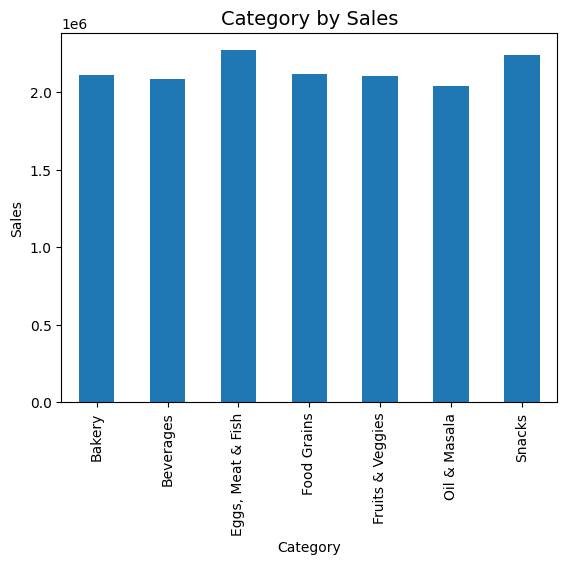

In [9]:
# Total sales by category
Sales_category=data.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

##### 2. Convert Date Columns to DateTime Format

In [10]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [11]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [12]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu          8   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu          8   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu         12   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu         11   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu         11   

   Order Month  Order Year  
0           11        2017  
1           11        2017  
2            6        2

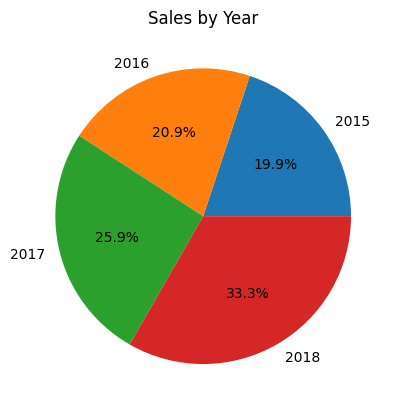

In [13]:
# Total number of sales for each year
Yearly_Sales=data.groupby("Order Year")["Sales"].sum()
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

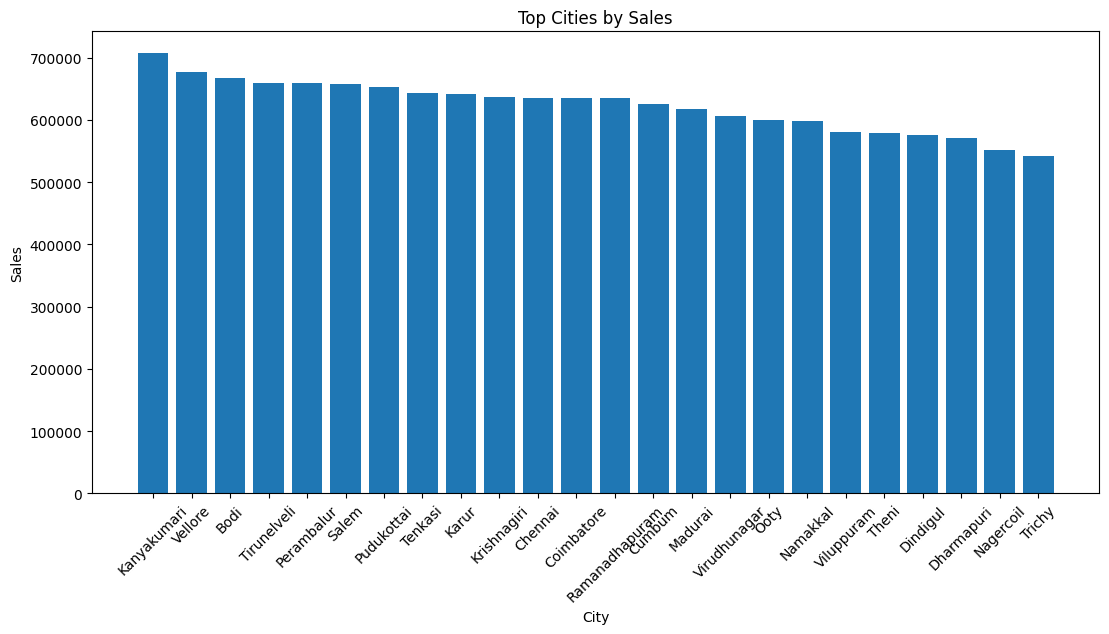

In [14]:
# Top Cities by Sales
city_sales = data[['City', 'Sales']]
total_sales = city_sales.groupby('City').sum()
sorted_cities = total_sales.sort_values(by='Sales',ascending=False)
top_cities = sorted_cities
plt.figure(figsize=(13, 6))
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top Cities by Sales')
plt.xticks(rotation=45)
plt.show()

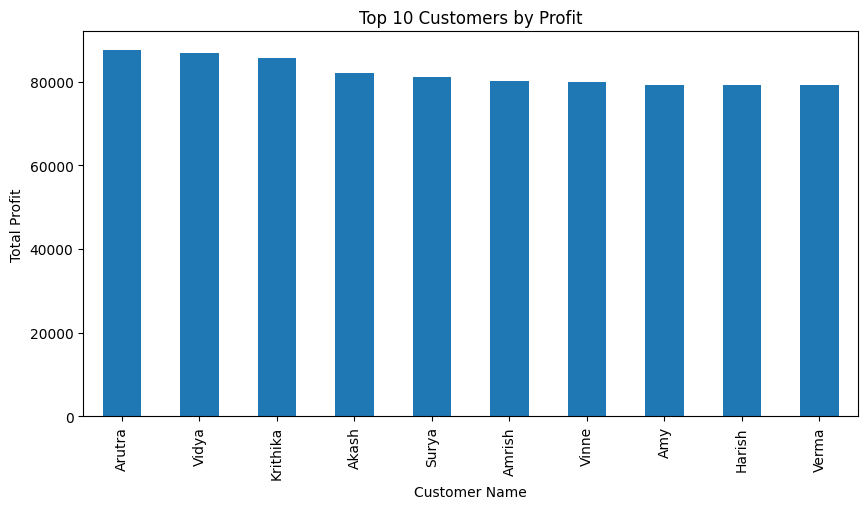

In [15]:
# Top 10 Customers by Profit
top_customers = data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10, 5), title='Top 10 Customers by Profit')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit')
plt.show()

##### 3. Label Encoding for Categorical Variables

- Convert categorical variables such as Category, Sub Category, City, Region, and
State into numerical values.

In [16]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu          8   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu          8   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu         12   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu         11   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu         11   

   Order Month  Order Year  
0           11        2017  
1           11        2017  
2            6        2

In [17]:
# Initialize the label encoder
le = LabelEncoder()

In [18]:
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

In [19]:
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0          8           11        2017  
1    749      0.18  149.80      0          8           11        2017  
2   2360      0.21  165.20      0         12            6        2017  
3    896      0.25   89.60      0         11           10        2016  
4   2355      0.26  918.45      0         11           10        2016  


#### Step 4: Exploratory Data Analysis (EDA)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4528\1302403003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


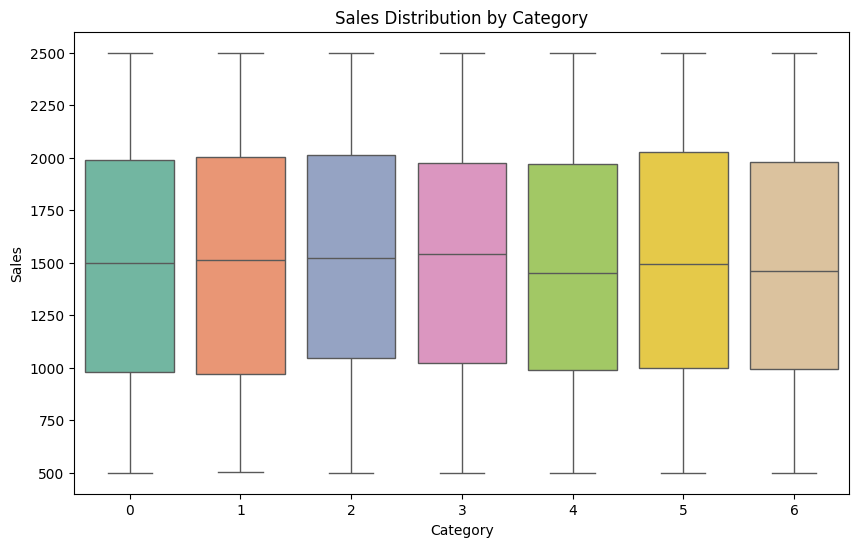

In [20]:
# 1. Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

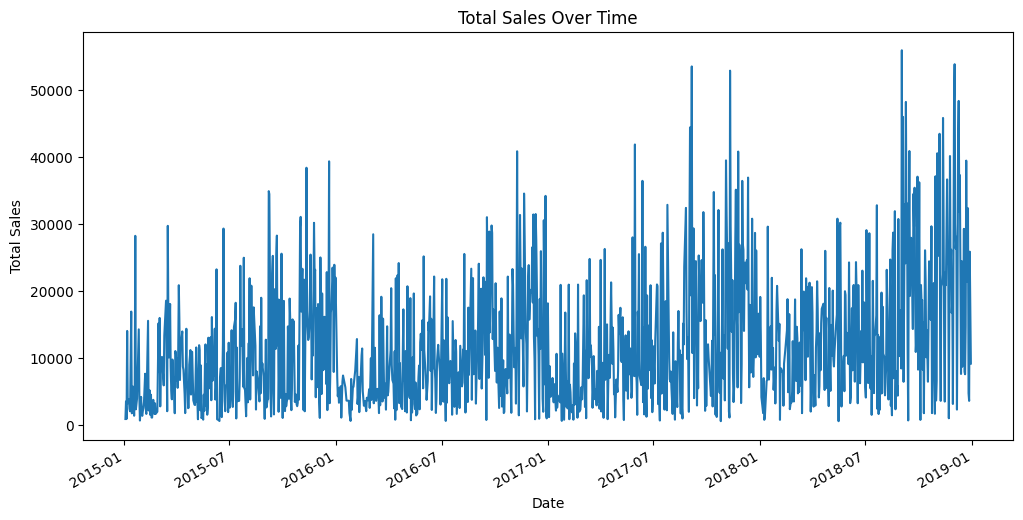

In [21]:
# 2. Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

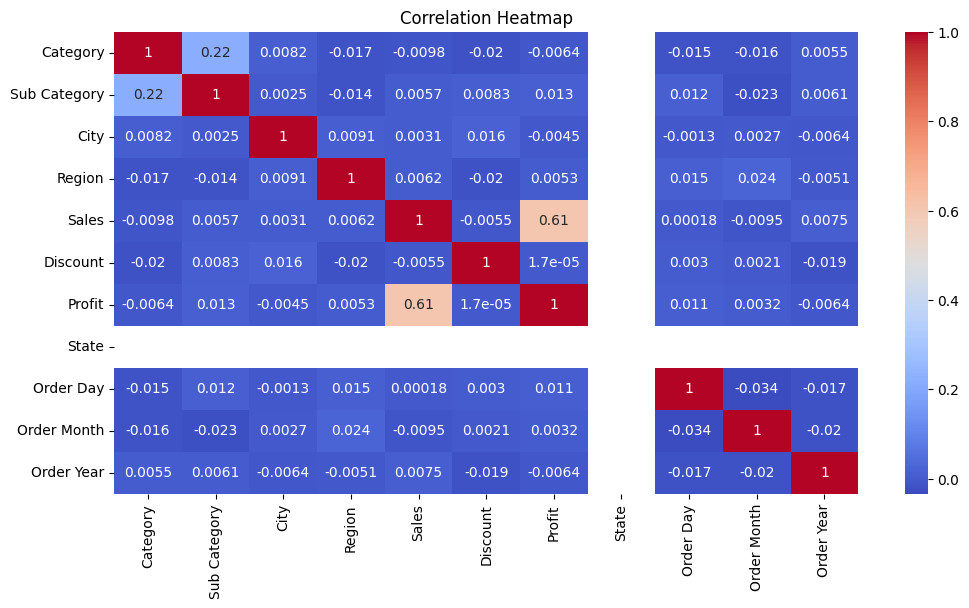

In [22]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 6))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Step 5: Feature Selection and Model Building

- We’ll use features like Category, Sub Category, City, Region, State,
order month, Discount, and Profit to predict Sales.

In [23]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])
target = data['Sales']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 6: Train a Linear Regression Model

In [26]:
# Initialize the model
model = LinearRegression()

In [27]:
# Train the modelmodel.fit(X_train, y_train)
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions
y_pred = model.predict(X_test)

#### Step 7: Evaluate the Model

- Evaluate the model performance using Mean Squared Error (MSE) and R-squared.

In [29]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213030.68736916437
R-squared: 0.35409350805366546


#### Step 8: Visualize the Results

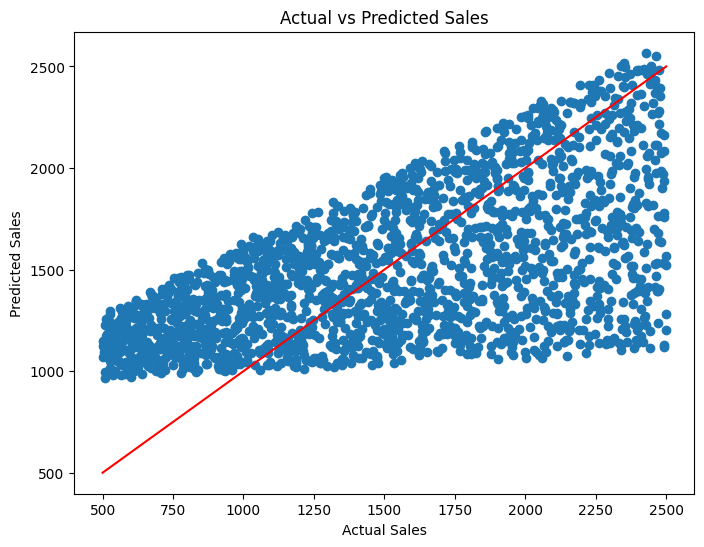

In [31]:
# 1. Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()